In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
def txtify(x,vec,name):
    a = np.hstack([x[:,None], vec[:,None]])
    a = np.vstack([np.array(['x', 'y'])[None,:], a])
    np.savetxt('{}.txt'.format(name), a, fmt="%s")

# Trees

In [18]:
depths = list(range(3,11))
branching_factors = list(range(2,5))

results = np.zeros((len(depths), len(branching_factors), 4))

In [19]:
for d_idx, d in enumerate(depths):
    results[d_idx] = np.load('tree/tree_depth{}.npy'.format(d))

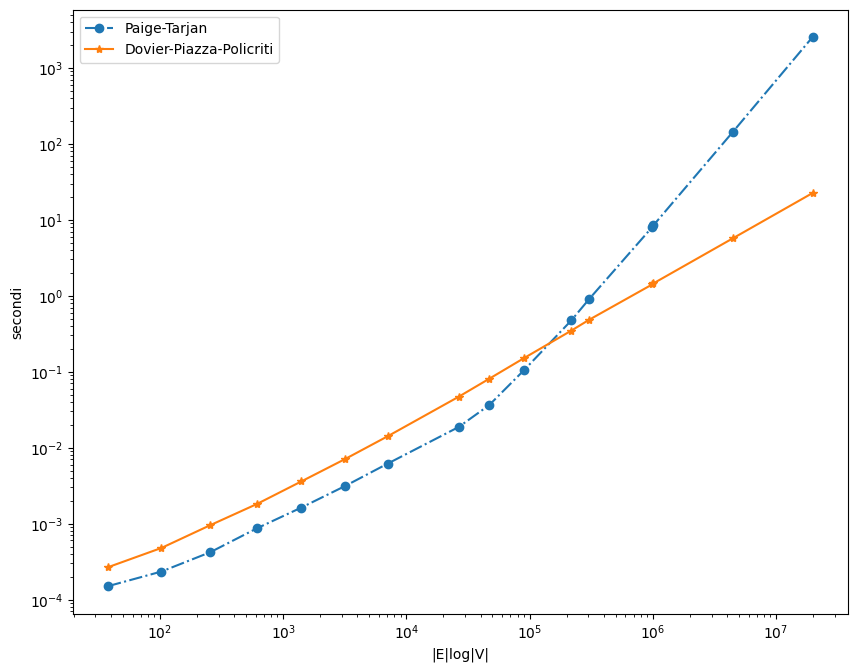

In [21]:
x = []
pta = []
fba = []

to_remove = [2,4,5,8,9,12,13,14]

for d_idx, d in enumerate(depths):
    for r_idx,r in enumerate(branching_factors):
        x.append(math.log(results[d_idx, r_idx, 2]) * results[d_idx, r_idx, 3])
        pta.append(results[d_idx, r_idx, 0])
        fba.append(results[d_idx, r_idx, 1])
        
x, pta, fba = zip(*sorted(zip(x, pta, fba)))
x = np.delete(x, to_remove)
pta = np.delete(pta, to_remove)
fba = np.delete(fba, to_remove)
        
plt.figure(figsize=(10,8), dpi=100)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.', marker='o')
plt.plot(x, fba, label='Dovier-Piazza-Policriti', marker='*')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

txtify(np.array(x), np.array(pta), 'tree/pta')
txtify(np.array(x), np.array(fba), 'tree/fba')

# Hopcroft

In [23]:
data = np.load('hopcroft/result_second_class.npy')
data.shape

(11, 4)

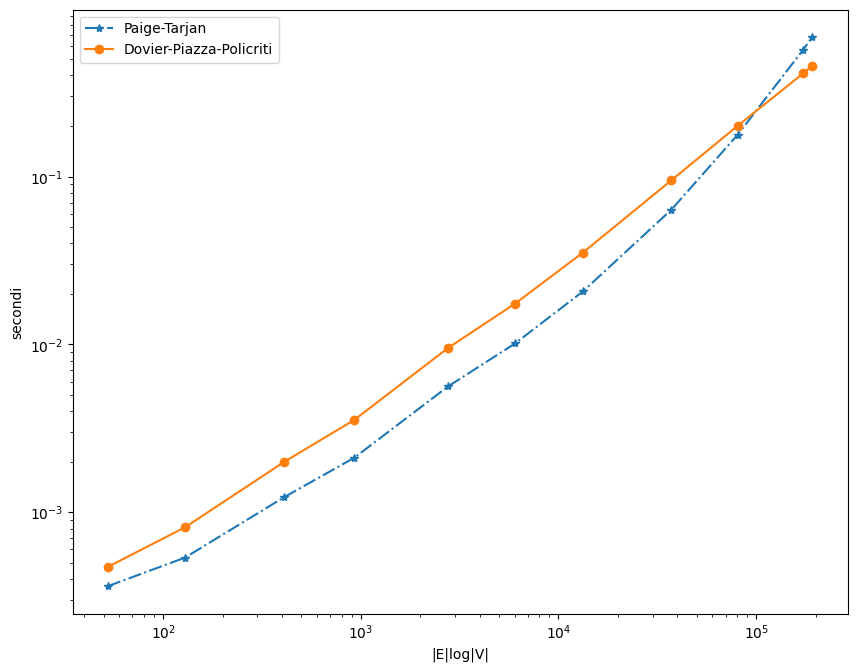

In [25]:
x = [math.log(vec[2]) * vec[3] for vec in data]
x, pta, fba = zip(*sorted(zip(x, data.T[0], data.T[1])))

plt.figure(figsize=(10,8), dpi=100)

plt.plot(x, pta, label='Paige-Tarjan', linestyle='-.', marker='*')
plt.plot(x, fba, label='Dovier-Piazza-Policriti', marker='o')

plt.xlabel('|E|log|V|')
plt.ylabel('secondi')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.show()

txtify(np.array(x), np.array(pta), 'hopcroft/pta')
txtify(np.array(x), np.array(fba), 'hopcroft/fba')

## Saha

In [44]:
data = np.array([np.load('tree_saha/result{}.npy'.format(i)) for i in range(5,11)])
data.shape

(6, 3, 10)

In [45]:
linlog_scale = np.apply_along_axis(lambda vec: math.log(vec[0]) * vec[1], 2, data[:,:,-2:]).flatten('C')
print(linlog_scale)
fbas = np.reshape(data[:,:,:4], (len(linlog_scale), 4), 'C')
sahas = np.reshape(data[:,:,4:-2], (len(linlog_scale), 4), 'C')

linlog_scale, fbas, sahas = zip(*sorted(zip(linlog_scale, fbas, sahas)))

linlog_scale = np.array(linlog_scale)
fbas = np.array(fbas)
sahas = np.array(sahas)

[8.95879735e+00 2.56874353e+02 2.14066685e+03 1.16754609e+01
 6.10367573e+02 7.64037619e+03 1.45560908e+01 1.40748094e+03
 2.65454681e+04 1.75777966e+01 3.18054849e+03 9.04720361e+04
 2.07232658e+01 7.08296565e+03 3.03879022e+05 2.39789527e+01
 1.55989712e+04 1.00897523e+06]


In [4]:
rm = [1,2,3,4,5,7,8,10,11,12]
#rm = []

linlog_scale = np.delete(linlog_scale, rm)
fbas = np.delete(fbas, rm, axis=0)
print(sahas.shape)
sahas = np.delete(sahas, rm, axis=0)
print(sahas.shape)

(18, 4)
(8, 4)


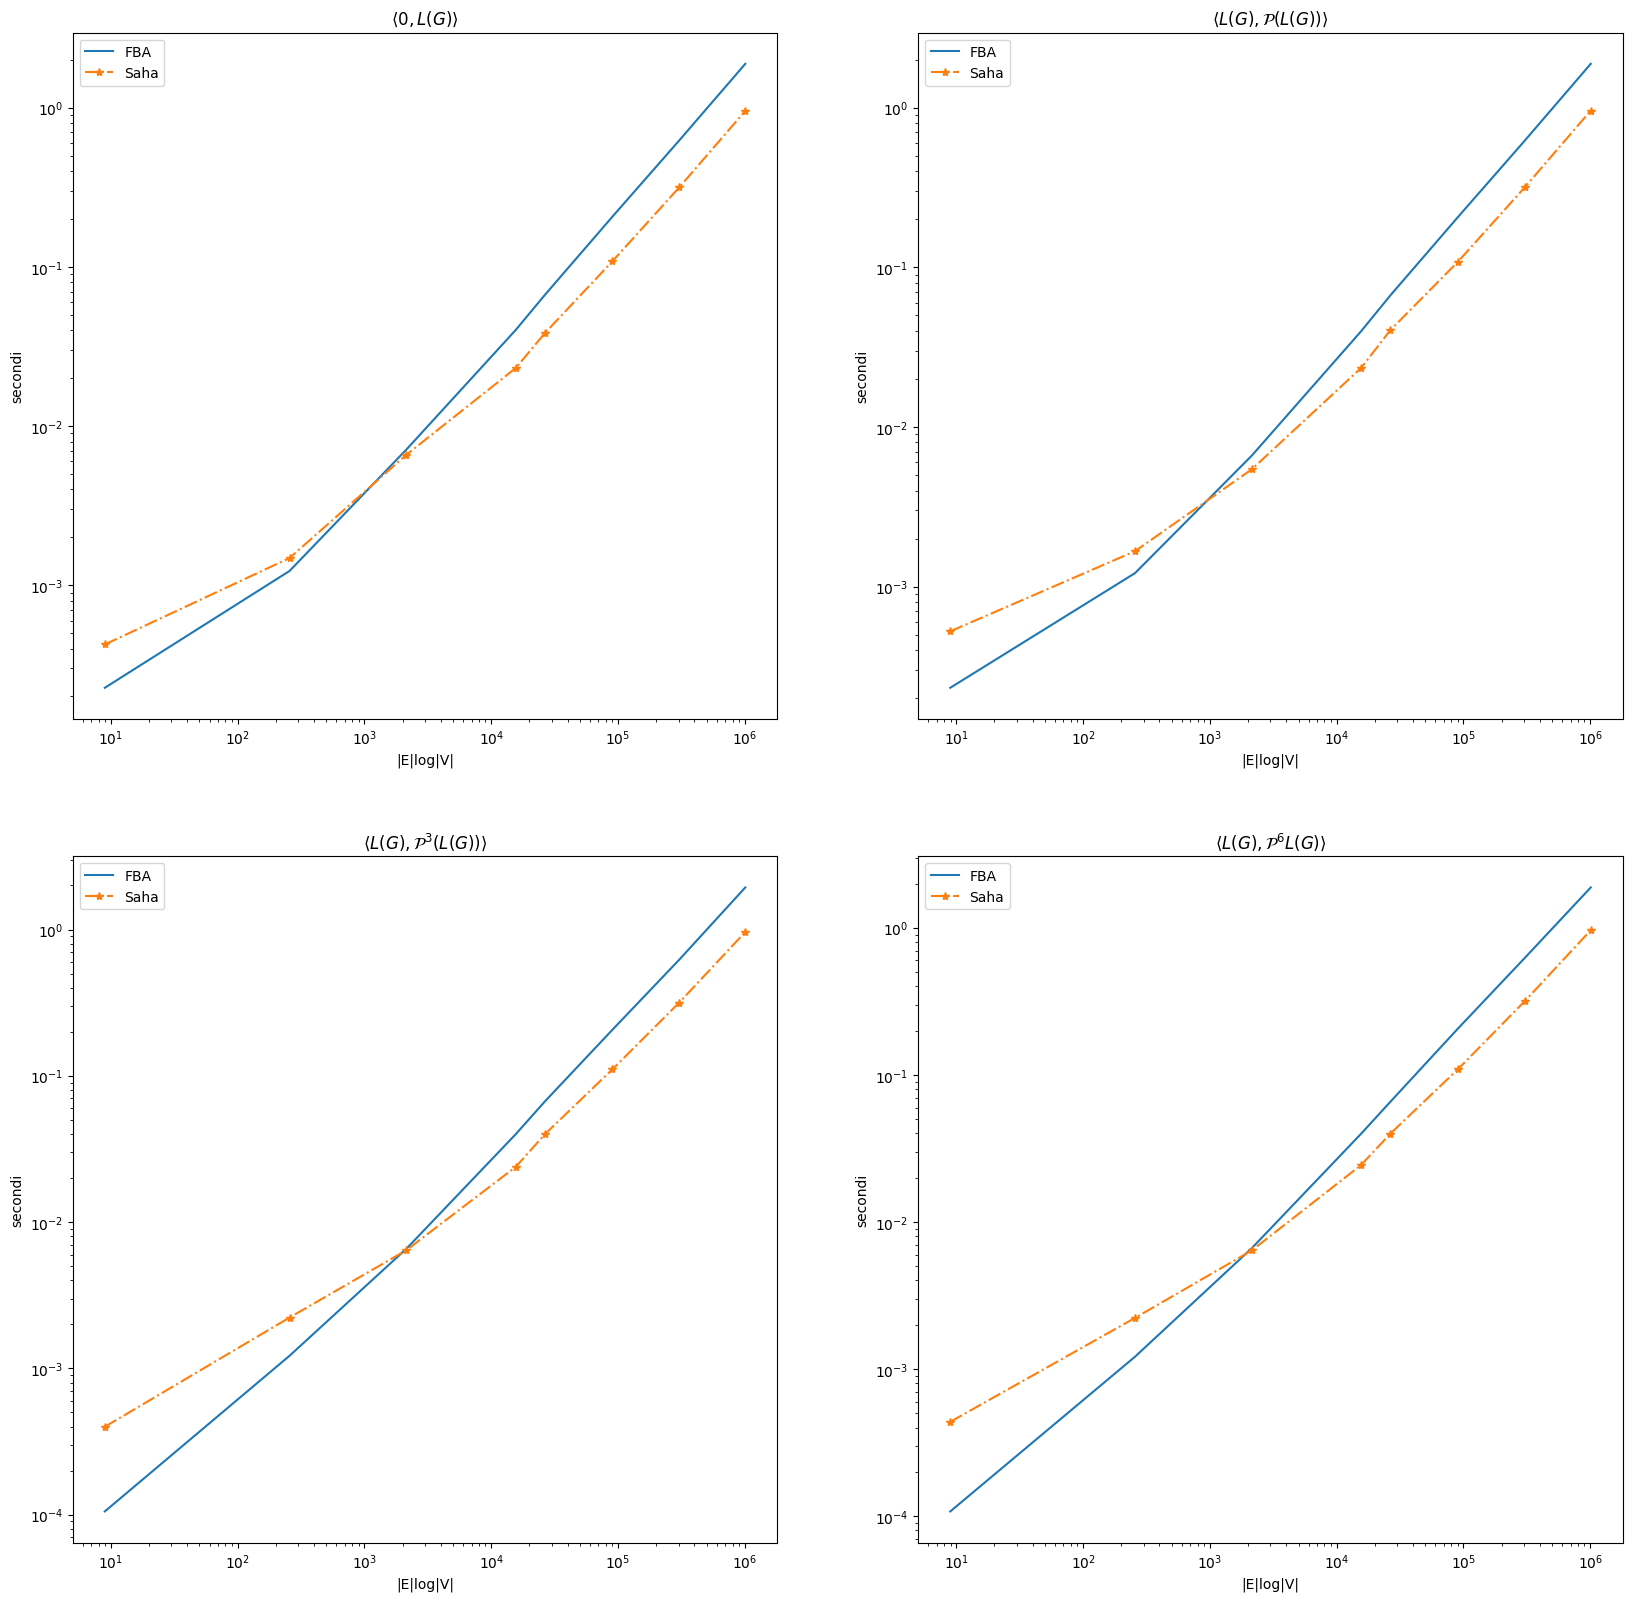

In [15]:
titles = ['$\\langle 0,L(G)\\rangle$', '$\langle L(G),\mathcal{P}(L(G))\\rangle$', 
          '$\\langle L(G),\mathcal{P}^3(L(G))\\rangle$', '$\\langle L(G),\mathcal{P}^6{L(G)}\\rangle$']
#indexes = [0,3,2,1]
indexes = [0,1,2,3]

plt.figure(figsize=(20,20), dpi=100)
for test_idx in range(4): 
    plt.subplot(2,2,test_idx+1)
    
    plt.plot(linlog_scale, fbas[:,indexes[test_idx]], label='FBA')
    plt.plot(linlog_scale, sahas[:,indexes[test_idx]], linestyle='-.', label='Saha', marker='*')
    
    plt.yscale('log')
    plt.xscale('log')
    
    plt.xlabel('|E|log|V|')
    plt.ylabel('secondi')
    
    plt.title(titles[test_idx])
    
    plt.legend()
    plt.savefig('../../sezione3/experimental_results/plots/saha_{}.png'.format(test_idx+1))

In [16]:
for test_idx in range(4):
    txtify(linlog_scale, fbas[:,indexes[test_idx]], 'tree_saha/fba{}'.format(test_idx))
    txtify(linlog_scale, sahas[:,indexes[test_idx]], 'tree_saha/sah{}'.format(test_idx))

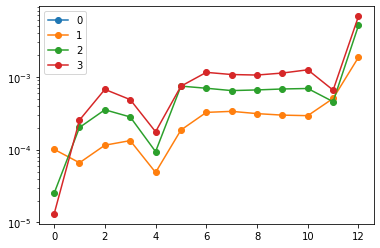

In [50]:
rm = [3,9,12,15,14]
#rm =[]

x = []
for idx,s in enumerate(sahas.T):
    plt.plot(np.delete(np.abs(s - sahas[:,0]), rm), label=idx, marker='o')
    x.append(np.delete(np.abs(s - sahas[:,0]), rm))
plt.legend()
plt.yscale('log')
plt.show()

for idx,s in enumerate(np.array(x[1:])):
    txtify(np.delete(linlog_scale,rm), s, 'tree_saha/saha_diff{}'.format(idx))